In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
y_train = y_train.reshape(-1,)  #converting 1D from 2D
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [40]:

y_test = y_test.reshape(-1,)

In [13]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [22]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

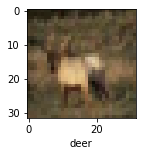

In [30]:
plot_sample(X_train, y_train, 3)

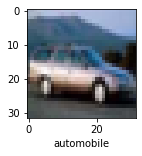

In [25]:

plot_sample(X_train, y_train, 4)

In [31]:
X_train = X_train / 255.0  #Normalizing into 0 to 1 range
X_test = X_test / 255.0

In [32]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [33]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 25s 16ms/step - loss: 1.6785 - accuracy: 0.3954
Epoch 2/20
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1386 - accuracy: 0.6011
Epoch 3/20
1563/1563 [==============================] - 24s 15ms/step - loss: 0.9836 - accuracy: 0.65570s -
Epoch 4/20
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8883 - accuracy: 0.6889
Epoch 5/20
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8335 - accuracy: 0.7096
Epoch 6/20
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7776 - accuracy: 0.72720s - loss: 0.7776 - accura
Epoch 7/20
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7109 - accuracy: 0.7538
Epoch 8/20
1563/1563 [==============================] - 31s 20ms/step - loss: 0.6644 - accuracy: 0.7671
Epoch 9/20
1563/1563 [==============================] - 29s 18ms/step - loss: 0.6163 - accuracy: 0.7879
Epoch 10/20
1563/1563 [===========

In [41]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.3607 - accuracy: 0.6699


[1.3606889247894287, 0.6699000000953674]

In [42]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[3.25199210e-07, 1.49256459e-06, 2.50437279e-05, 9.98930156e-01,
        1.62383294e-04, 8.94492769e-05, 7.48357794e-04, 1.31263285e-08,
        1.51876156e-05, 2.75037892e-05],
       [4.47052116e-06, 2.08707079e-02, 3.53166997e-12, 3.69048236e-10,
        8.99363862e-14, 6.84308228e-14, 6.20835393e-16, 1.69600084e-16,
        9.79124725e-01, 1.25068112e-07],
       [4.50573653e-01, 8.32736790e-02, 1.23046071e-03, 4.55769850e-03,
        8.38085040e-02, 4.30526696e-02, 1.52524008e-04, 8.74188095e-02,
        1.48750156e-01, 9.71818641e-02],
       [9.42174673e-01, 1.19403691e-03, 1.17743639e-02, 6.04822824e-04,
        1.86535921e-02, 5.79185871e-06, 5.25899559e-05, 1.81822813e-07,
        2.55376827e-02, 2.17666866e-06],
       [2.58399940e-10, 3.61059698e-08, 4.12678765e-03, 2.03286111e-03,
        5.77344745e-02, 6.34341923e-05, 9.36042309e-01, 3.53909191e-09,
        3.57073295e-11, 8.61681642e-08]], dtype=float32)

In [43]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 0, 0, 6]

In [44]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

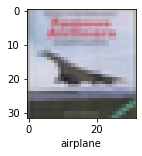

In [45]:
plot_sample(X_test, y_test,3)

In [46]:

classes[y_classes[3]]

'airplane'